<img src="https://communications.tulane.edu/sites/default/files/TUlogo2020.png" alt="drawing" width="20%"/> 
<center><h1>E-commerce business data analysis</h1></center>

<center><h3> by Lorena Peñuela Cantor </h3></center>

<center><h3><a href="https://lpenuelac.github.io">Website</a></h3></center>




<a name="content"></a>
# **Content**
1- [Goal](#goal)  
2-  [Collaboration Plan](#collaboration)  
3 -  [Datasets](#datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1-   [Exploratory data analysis](#EDA)  
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.1-   [Customers location](#customersl)  
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.2-   [Sellers location](#sellersl)  
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.3-   [First question](#firstq)  
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.4-   [Orders](#orders)  
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1.5-   [Second question](#secondq)  


<a name="goal"></a>
# **Goal**

The main goal of this project is to use the data from the the brazilian company [Olist](https://olist.com/pt-br/) to identify buying patterns that allow generating knowledge about its operations and add value to the business; through the extraction, analysis, and visualization of data.

<a name="collaboration"></a>
# **Collaboration Plan**

This work will be carried out solely by me as a master's student, based on what I learned in the Introduction to Data Science classes and the feedback received by Dr. Nicholas Mattei as professor of the course.

This project is developed using python as programming language, Google Colab as development environment and GitHub as code repository and web server.

<a name="datasets"></a>
# **Datasets**

This dataset is in [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)
On the web page you can also find the data model, which is important to understand the relationship that exists between the different datasets.

![image](https://i.imgur.com/HRhd2Y0.png)

There are eight datasets with the following data:


1.   olist_order_payments_dataset: It includes the payment option and the number of installments if it is a credit card.
2.   olist_orders_dataset: It relates all the information of an order, including delivery date, purchase date, and approved date. 
3.  olist_order_reviews_dataset: At the end of a purchase, Olist sends a customer survey that allows capturing the customer's satisfaction with their purchase. This information is stored in this dataset
4. olist_order_customer_dataset (as olist_customers_dataset): It stores data related to the customers and their locations as state, city and zip code.
5. olist_products_dataset: It stores data related to the products sold by Olist.
6. olist_order_items_dataset: An order could have more than one product. Then, this dataset stores all the products purchased in a order. 
7. olist_sellers_dataset: It stores the data related to the sellers and their locations as state, city, and zip code.
8. olist_geolocation_dataset: It relates the Brazilian zip codes to latitude and longitude. 




<a name="EDA"></a>
## **Exploratory data analysis**

One of the business questions that I would like to delve into is whether the location of customers and vendors affects sales or the products purchased, so I will mainly analyze the related data sets of customers and sellers as well as the datasets that allow them to be related.
For this, it is necessary to know how the buyers are distributed, how the sellers are distributed, and how the delivered orders are distributed.

In [53]:
#Reading the main datasets related to the bussiness question. 
import pandas as pd
import matplotlib.pyplot as plt
customers = pd.read_csv("../data/olist_customers_dataset.csv")
sellers =  pd.read_csv("../data/olist_sellers_dataset.csv")
#This dataset is useful to make a map based geometries
#For the visualization, geopandas is required
# See how to install it https://geopandas.org/en/stable/getting_started/install.html
import geopandas as gpd
locations =  gpd.read_file("zip://../data/states.zip")
#Ignoring user warnings about KMeans memory leak
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

<a name="customersl"></a>
### **Customers Location**

In [2]:
#The data availabe for the customers
customers.head(4)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP

In [3]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In this case, the customers have 5 variables and all of them are correctly identified. 

In [4]:
#The dataset doesn't have null or nan values
customers.isnull().count()
customers.isna().count()

customer_id                 99441
customer_unique_id          99441
customer_zip_code_prefix    99441
customer_city               99441
customer_state              99441
dtype: int64

An important feature of this dataset is that two identifiers are found. The `customer_id` represents an identifier of the client within the orders, that is to say, that a client can have several `customer_id` if she has made several orders, while she only has a `customer_unique_id`.
So we are interested in knowing the number of customers of the company and if their location remains the same in each order

In [5]:
#Total of rows in the customers dataframe
display("Number of no unique customers",customers.shape[0])
#Total of rows with unique id of the customers dataframe
display("Number of customers",len(pd.unique(customers["customer_unique_id"])))

'Number of no unique customers'

99441

'Number of customers'

96096

This means that about 3000 records refer to customers who have made repurchases

In [6]:
#Getting the number number of ids (or orders) created by one user
customers_by_orders = customers.groupby("customer_unique_id").count()["customer_id"].reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
#Customers who purchased one order
customers_one_order=customers_by_orders.loc[customers_by_orders["count"]==1]["customer_unique_id"]
display("customers who purchased one order")
display(customers_one_order)
# Obtaining clients who do not change their location
unduplicated_customers = customers[~customers.duplicated(subset=["customer_unique_id","customer_city","customer_zip_code_prefix","customer_state"],keep=False)]
display("unique customers")
display(unduplicated_customers)
# Removing customers of a single purchase to get customers who have different locations
customers_different_location = unduplicated_customers.loc[~unduplicated_customers["customer_unique_id"].isin(customers_one_order)]
display("customer with different locations")
display(customers_different_location)

'customers who purchased one order'

65416    adfdc84671ccd55dc3c4aa31b363bfb4
65652    ae9ae5072fe8d5b2a1f7072a833f0afc
64300    aaff146bd210808c7d004a05966472a7
65653    ae9b625c590bbfdd9e9ef836fbcbc7c9
65654    ae9b719375655dab3c518d76cc37a843
                       ...               
32508    5657dfebff5868c4dc7e8355fea865c4
32507    5657596addb4d7b07b32cd330614bdf8
32506    5656eb169546146caeab56c3ffc3d268
32505    5656a8fabc8629ff96b2bc14f8c09a27
96095    ffffd2657e2aad2907e67c3e9daecbeb
Name: customer_unique_id, Length: 93099, dtype: object

'unique customers'

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[93582 rows x 5 columns]

'customer with different locations'

customer_id                customer_unique_id  \
5      879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   
387    13e8265ea7e8a11df7a56799f5806220  d55417a83a73d1702b43988e63f0731a   
453    302025f399c7405c509a297b6b9a1e73  7bf1c59401206e31a78523077f3a1144   
559    079da973ecd0fb654da4ffdb946c9ea1  527c6fbbe85cdf78ff1645e0a71e266f   
562    05425c98e35d762211742df2a2b30af0  87a7c3090f96d9da963125a0d7f8193a   
...                                 ...                               ...   
99182  bafd51862cb88bd42d499170c2ac35fd  408aee96c75632a92e5079eee61da399   
99227  1bd05d9a0031e8461d15550893d9b85a  13abc50b97af7425b5066e405d7cd760   
99297  8b9f55ee19f0356ba6b3f03485e6922d  bc7b9e0d078c0c01f622b38cfcd7ee9c   
99353  282fbce48e4d2077aad602dd125c9225  0ceb502fc33a2ad327b08288c5310e2e   
99406  d9110683c7a282144e9fc97660026a28  5cbfdb85ec130898108b32c50d619c39   

       customer_zip_code_prefix         customer_city customer_state  
5                         89254        jaragua do sul             SC  
387                        8576       itaquaquecetuba             SP  
453                        6765       taboao da serra             SP  
559                        1455             sao paulo             SP  
562                        6114                osasco             SP  
...                         ...                   ...            ...  
99182                     22260        rio de janeiro             RJ  
99227                      7793               cajamar             SP  
99297                     20521        rio de janeiro             RJ  
99353                     29134                 viana             ES  
99406                     74980  aparecida de goiania             GO  

[483 rows x 5 columns]

In [7]:
#One example of a customer who has two different locations
customers.loc[customers["customer_unique_id"]=="d55417a83a73d1702b43988e63f0731a"]

customer_id                customer_unique_id  \
387    13e8265ea7e8a11df7a56799f5806220  d55417a83a73d1702b43988e63f0731a   
56661  ee910160bbbdf7ba4b1dbd4dbc1db3ae  d55417a83a73d1702b43988e63f0731a   

       customer_zip_code_prefix    customer_city customer_state  
387                        8576  itaquaquecetuba             SP  
56661                      3613        sao paulo             SP

Taking into account the above, it is observed that although a client may have more than one location and there is no way of knowing which is its residence, it is feasible to obtain the distribution of the location of the customers without taking into account whether it is unique or not. In the end, we want to know if there is a pattern from where the delivery of the order was made and the location of the sellers.

In [8]:
#Cleaning geometry dataset to get the geometry and the acronym of each state
#and deleting additional variables.
locations[['COUNTRY','STATE']] = locations['HASC_1'].str.split('.',expand=True)
locations = locations.drop(columns=["ID_0","ISO","NAME_0","ID_1","CCN_1","CCA_1","TYPE_1","ENGTYPE_1","NL_NAME_1","VARNAME_1","COUNTRY","HASC_1"])
locations = locations.rename(columns ={'NAME_1':'NAME'})
locations.head(5)

NAME                                           geometry STATE
0      Acre  POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...    AC
1   Alagoas  MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ...    AL
2     Amapá  MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0...    AP
3  Amazonas  POLYGON ((-67.32623 2.02968, -67.30118 1.92997...    AM
4     Bahia  MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...    BA

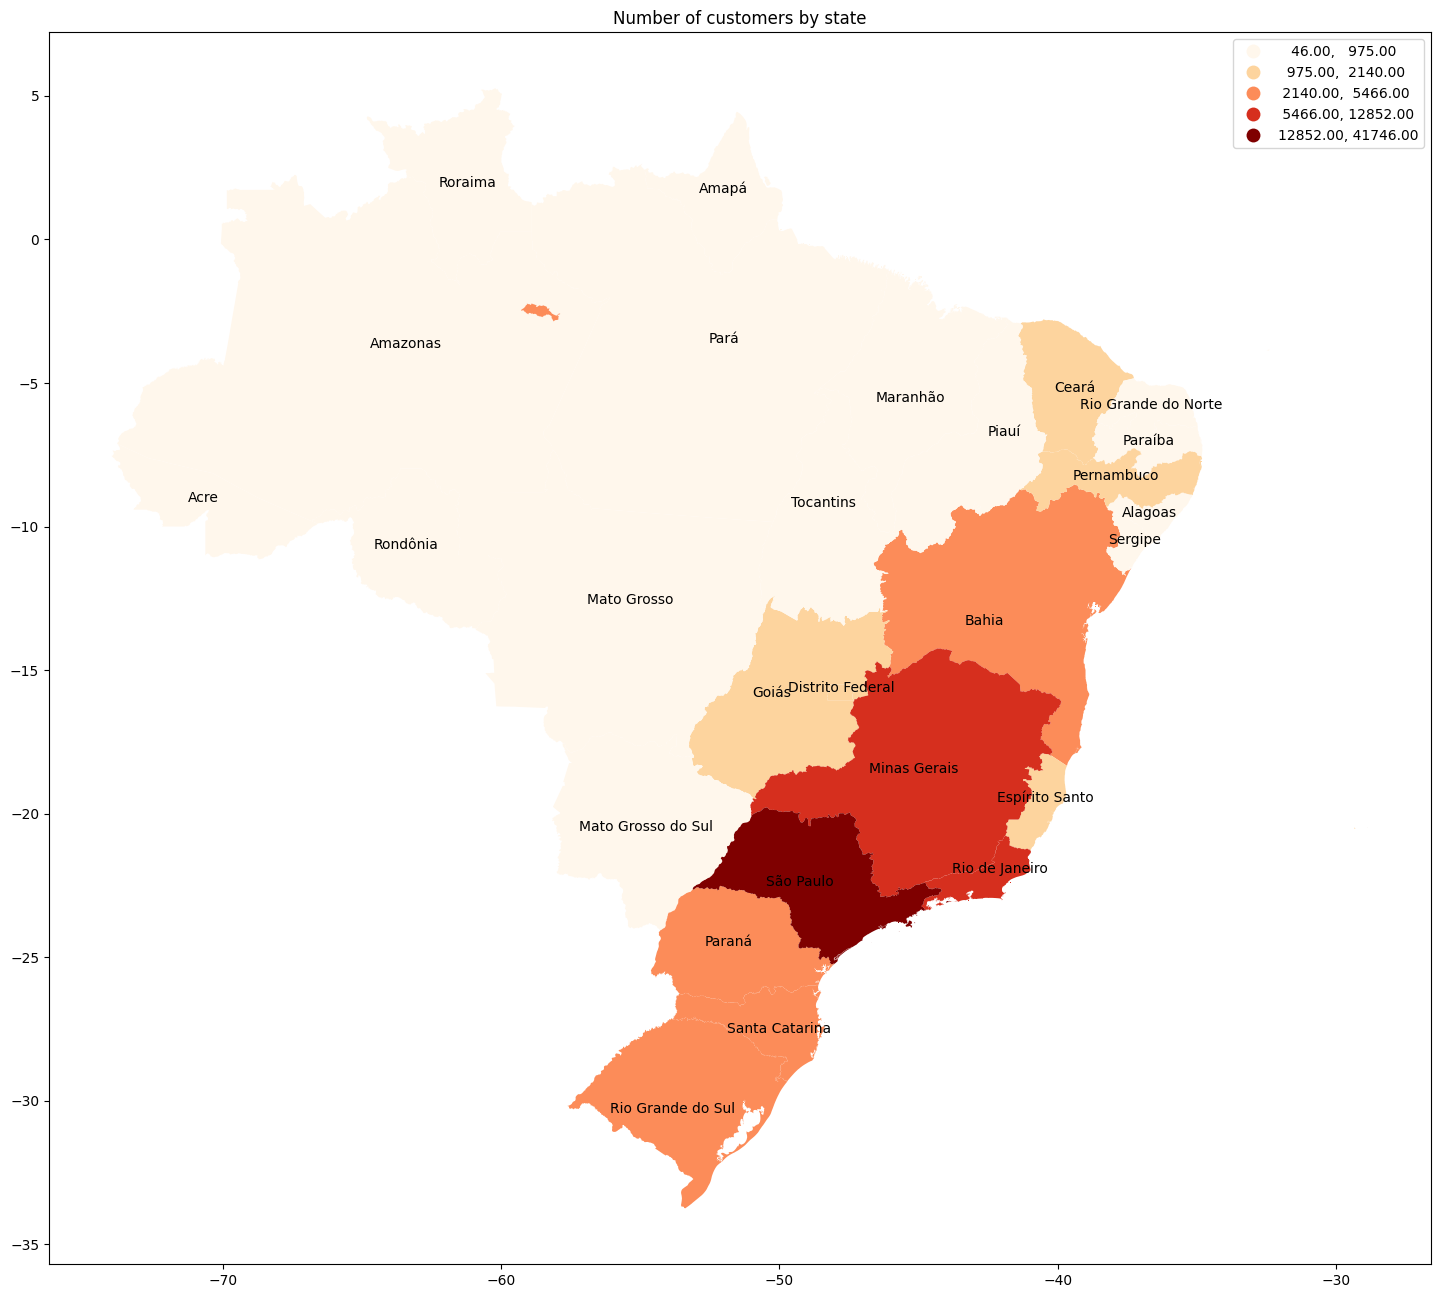

In [9]:
#Visualizing customers by state
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
#defining the figure to create
fig, ax = plt.subplots(1, 1,figsize=(20, 16))
#Joining geometries and number of customers
customer_state = pd.DataFrame(customers.groupby("customer_state").count()["customer_id"])
location_customers=locations.merge(customer_state,left_on="STATE",right_on="customer_state")
#Defining coords for set the label on each state
location_customers["coords"] = location_customers["geometry"].apply(lambda x: x.representative_point().coords[:])
location_customers["coords"] = [coords[0] for coords in location_customers["coords"]]
#Plotting data
location_customers.plot(column='customer_id',ax=ax, cmap='OrRd', scheme='natural_breaks',
           legend=True)
ax.set_title("Number of customers by state")
for idx, row in location_customers.iterrows():
    ax.annotate(row['NAME'], xy=row["coords"], horizontalalignment="center", color="black")


For this case, it is observed that the SP (São Paulo) state is where more orders are delivered, and there is more presence of clients in the south of the country

<AxesSubplot:title={'center':'Cities from where a user receives a purchase'}, xlabel='customer_state,customer_city', ylabel='Number of customers'>

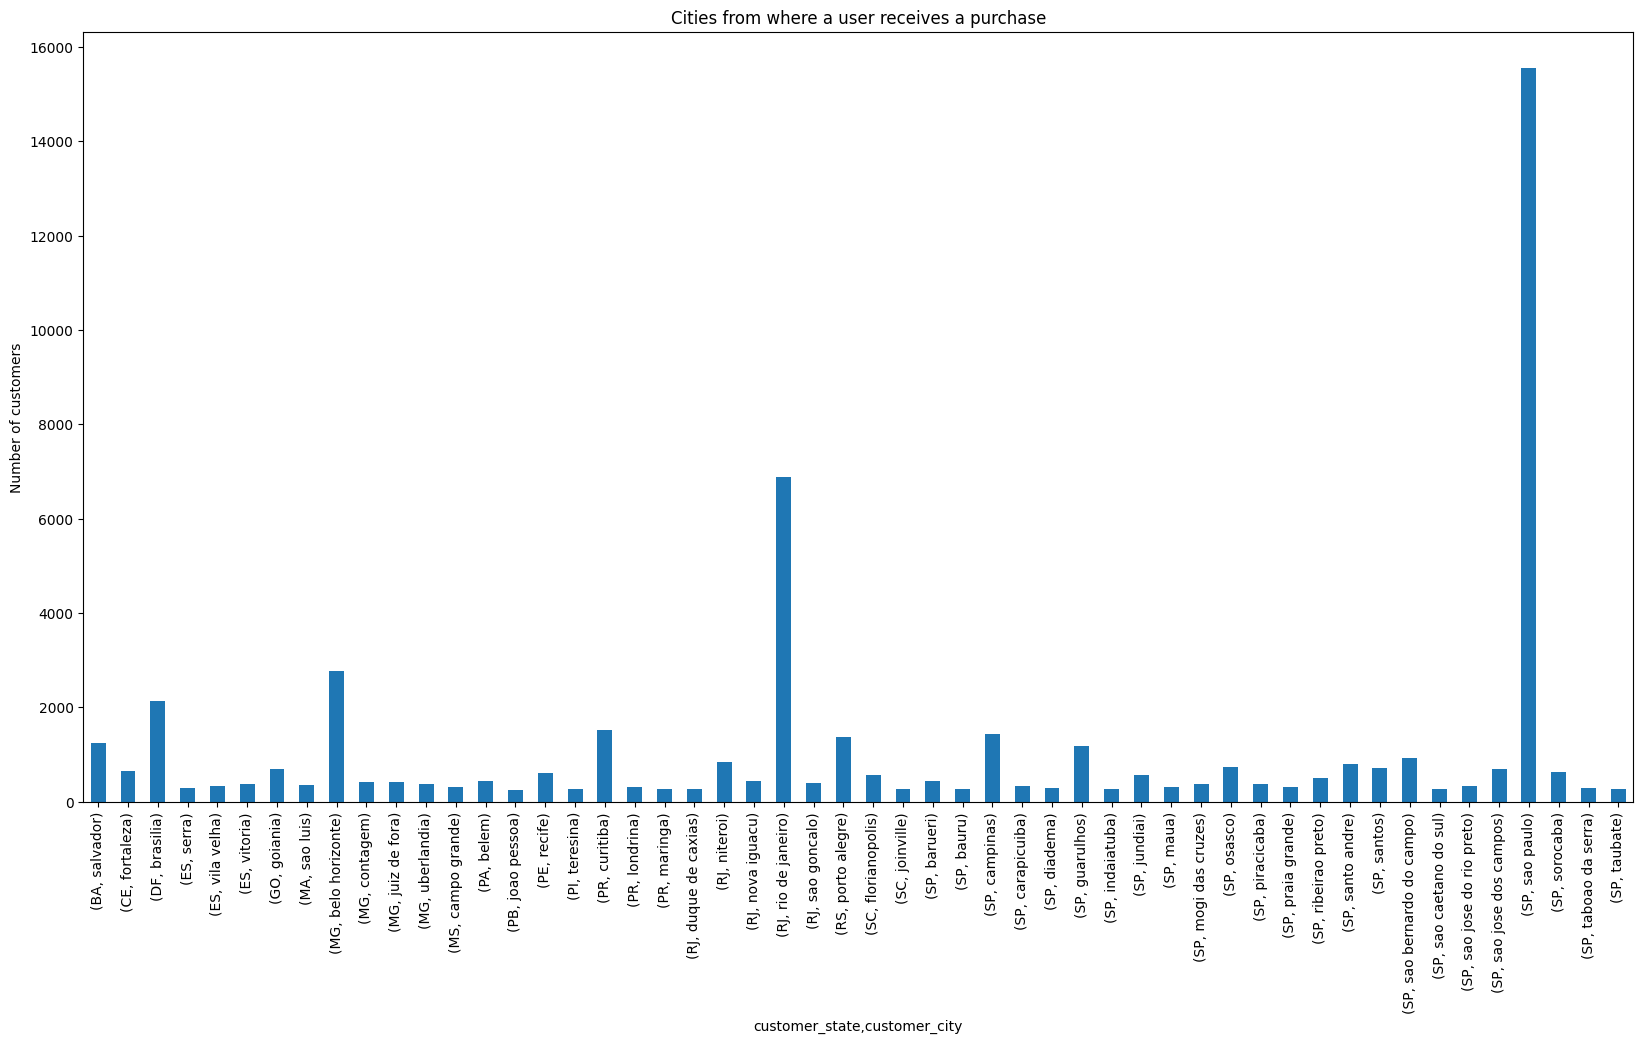

In [10]:
#Visualizing customers by city

customers_city_state= customers.groupby(["customer_state","customer_city"]).count()
customers_city_state = customers_city_state.loc[customers_city_state["customer_id"]>250]
customers_city_state["customer_id"].plot.bar(title="Cities from where a user receives a purchase",ylabel="Number of customers",figsize=(20, 10))

For display purposes, cities with more than 250 customers who have received an order are selected. Additionally, Sao Paulo was observed as the city where most purchases are received, followed by Rio de Janeiro, which correspond to the most populated cities in Brazil.

<a name="sellersl"></a>
### **Sellers Location**

In [11]:
#Visualizing the sellers dataframe
sellers.head(4)

seller_id  seller_zip_code_prefix     seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023        campinas   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844      mogi guacu   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031  rio de janeiro   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195       sao paulo   

  seller_state  
0           SP  
1           SP  
2           RJ  
3           SP

In [12]:
#The variables are correctly defined
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [13]:
#There are no seller duplicates 
sellers.seller_id.is_unique

True

Unlike buyers, sellers have a single location so it is possible to see their distribution directly


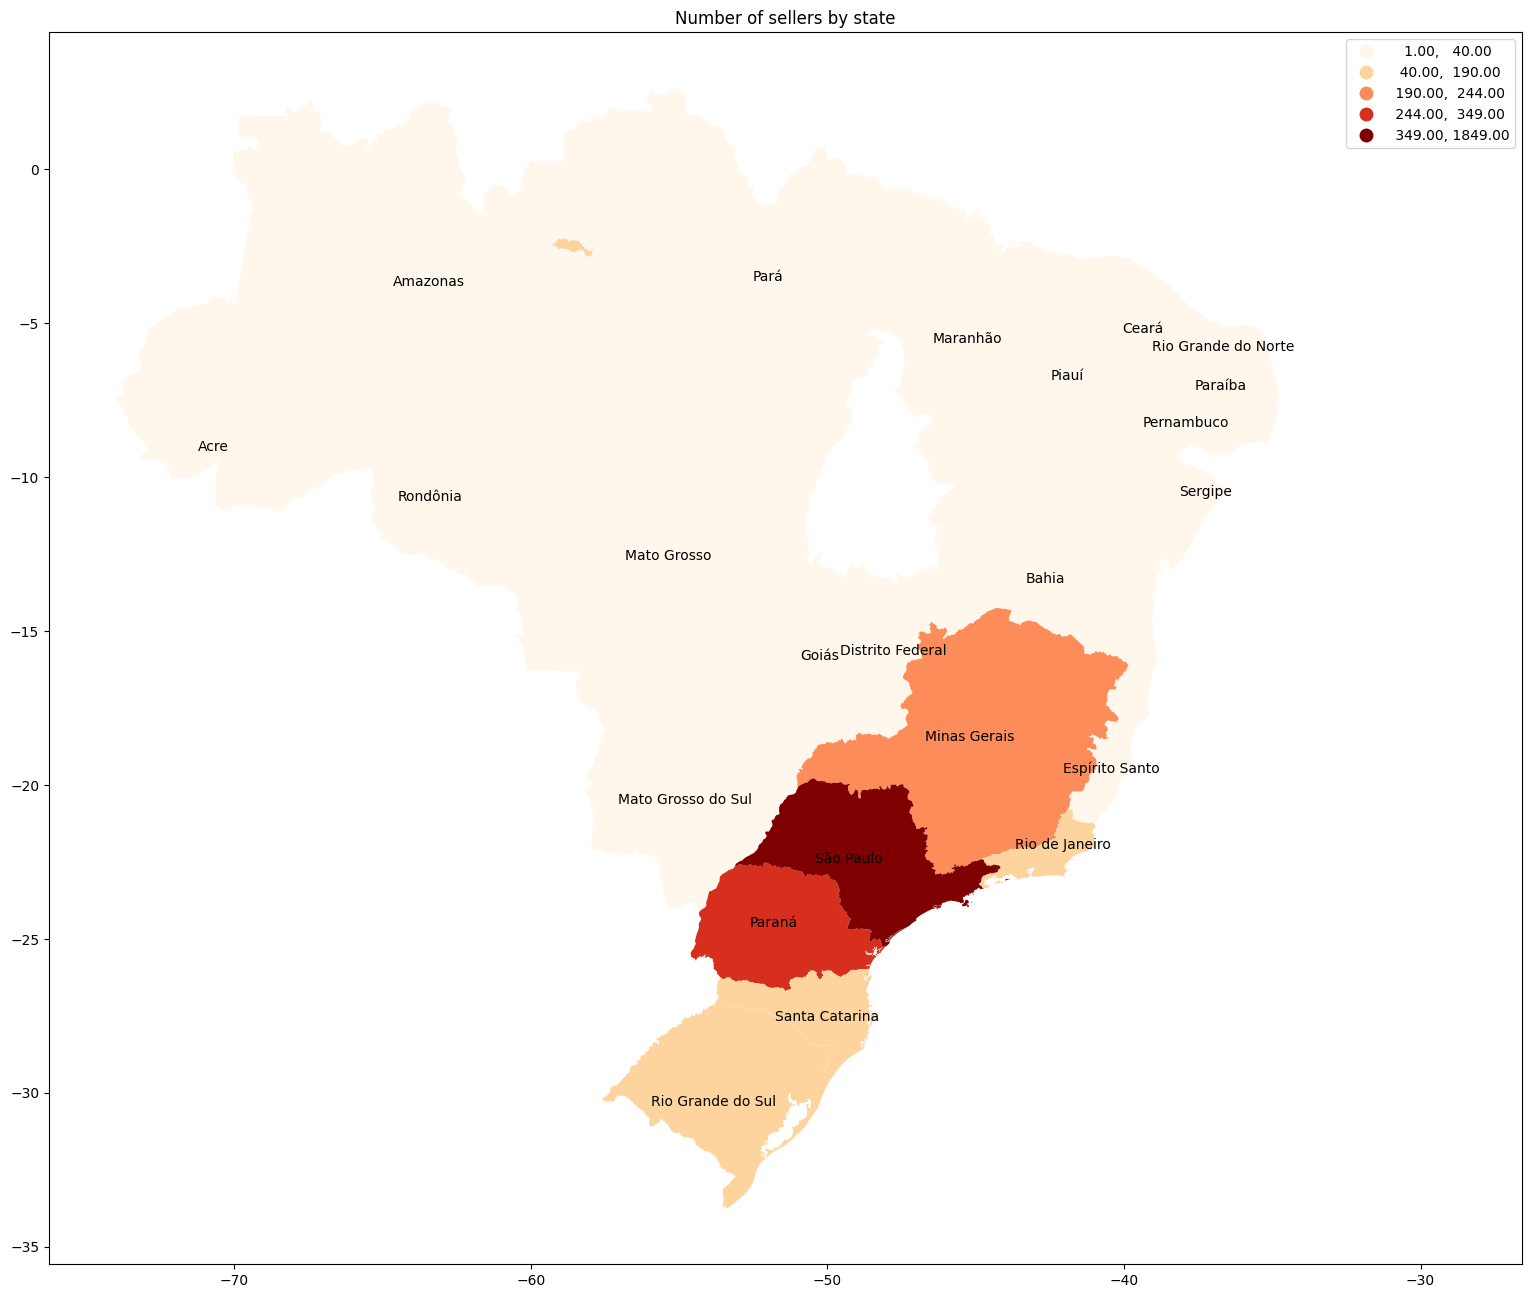

In [14]:
#Visualizing sellers by state
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
#defining the figure to create
fig, ax = plt.subplots(1, 1,figsize=(20, 16))
#Joining geometries and number of sellers
seller_state = pd.DataFrame(sellers.groupby("seller_state").count()["seller_id"])
seller_customers=locations.merge(seller_state,left_on="STATE",right_on="seller_state")
#Defining coords for set the label on each state
seller_customers["coords"] = seller_customers["geometry"].apply(lambda x: x.representative_point().coords[:])
seller_customers["coords"] = [coords[0] for coords in seller_customers["coords"]]
#Plotting data
seller_customers.plot(column='seller_id',ax=ax, cmap='OrRd', scheme='natural_breaks',
           legend=True)
ax.set_title("Number of sellers by state")
for idx, row in seller_customers.iterrows():
    ax.annotate(row['NAME'], xy=row["coords"], horizontalalignment="center", color="black")

<AxesSubplot:title={'center':'Cities from where a seller sends an order'}, xlabel='seller_state,seller_city', ylabel='Number of sellers'>

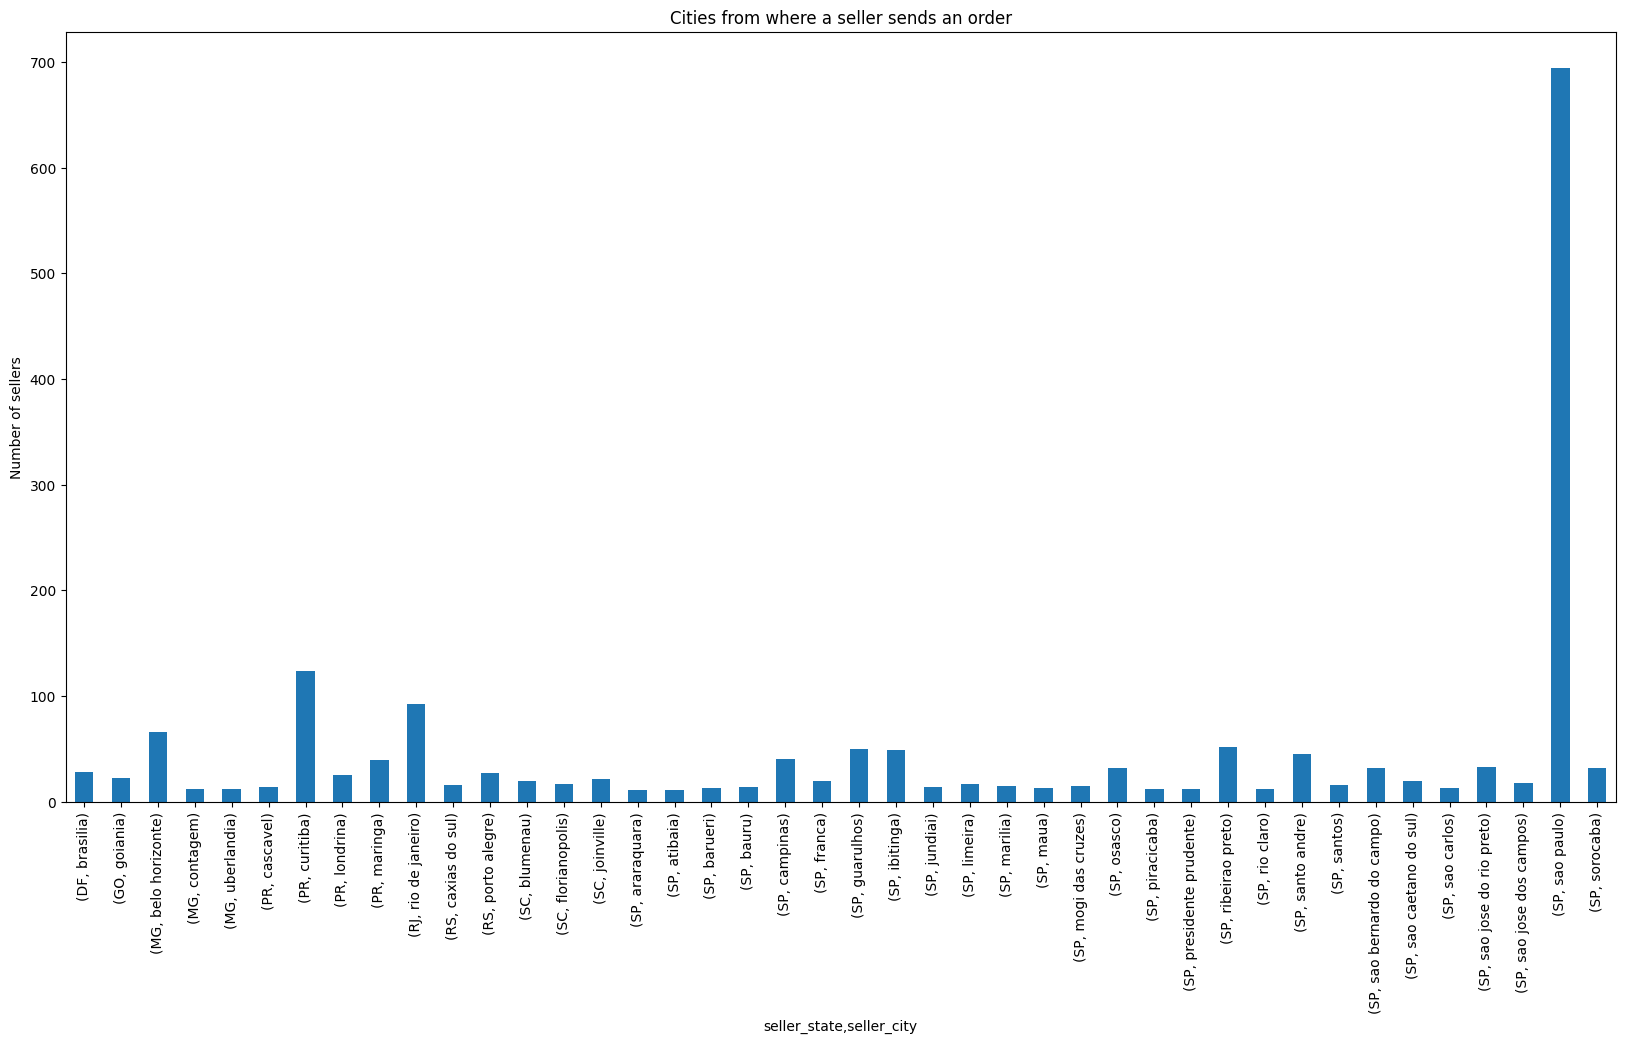

In [15]:
#Visualizing sellers by city
sellers_city_state= sellers.groupby(["seller_state","seller_city"]).count()
sellers_city_state=sellers_city_state.loc[sellers_city_state["seller_id"]>10]
sellers_city_state["seller_id"].plot.bar(title="Cities from where a seller sends an order",ylabel="Number of sellers",figsize=(20, 10))


It is interesting because we also have the state of SP and the city of Sao Paulo with more sellers as well as buyers, however the second city with more sellers is Curitiba, which is also where the location of Olist.

In the previous images we could see the amount of sellers and buyers by city, but are these proportional with the population of each city? 
We are going to use the population data provided in this [website](https://worldpopulationreview.com/countries/cities/brazil) which contains 2022 population data by city.

<AxesSubplot:title={'center':'Number of sellers per 100,000 people per city'}, xlabel='city'>

<Figure size 640x480 with 0 Axes>

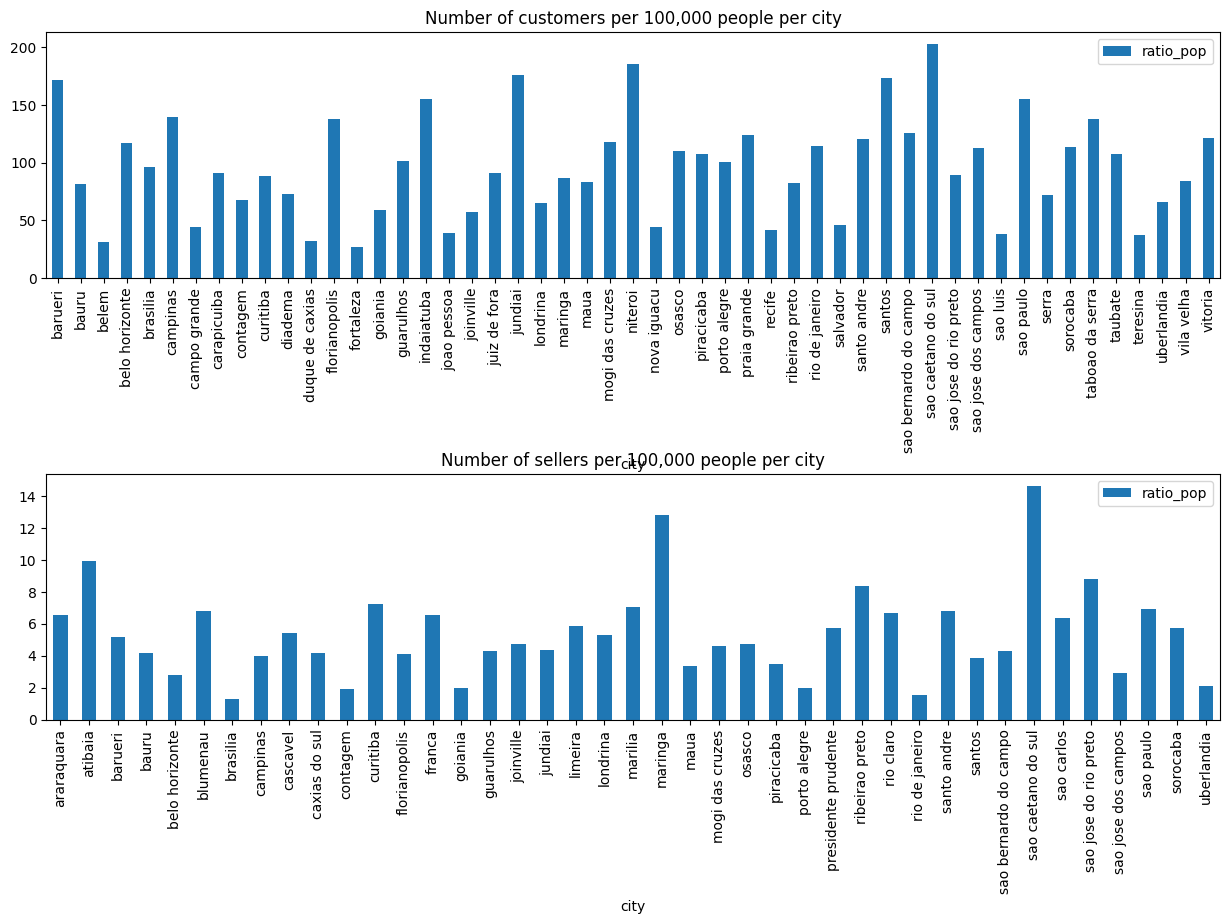

In [16]:
pop_city=pd.read_csv("../data/population.csv")
#Left city names in lowercase to join with sellers and customers data
pop_city["city"]=pop_city["city"].str.lower()
# Joining with cities with more than 250 customers
customers_city_pop = customers_city_state.merge(pop_city,left_on="customer_city",right_on="city",how="left")
customers_city_pop.dropna(inplace=True)
#Normalizing by population
customers_city_pop["ratio_pop"]=(customers_city_pop["customer_id"]*100000)/customers_city_pop["2022"]
# Joining with the cities with more than 10 sellers
sellers_city_pop = sellers_city_state.merge(pop_city,left_on="seller_city",right_on="city",how="left")
sellers_city_pop.dropna(inplace=True)
#Normalizing by population
sellers_city_pop["ratio_pop"]=(sellers_city_pop["seller_id"]*100000)/sellers_city_pop["2022"]
#Making a graph for city vs ratio_pop
fig=plt.figure()
figsize=(20, 10)
# Setting up columns and defining cities as index
sellers_graph= sellers_city_pop[["city","ratio_pop"]]
sellers_graph.set_index("city",inplace=True)
sellers_graph.sort_index(inplace=True) 
customer_graph= customers_city_pop[["city","ratio_pop"]]
customer_graph.set_index("city",inplace=True)
customer_graph.sort_index(inplace=True) 
fig, axes = plt.subplots(nrows=2, ncols=1)
#Setting figure to get a better visualization
fig.set_size_inches(15.5, 10.5)
fig.tight_layout(pad=12.0)
customer_graph.plot.bar(title="Number of customers per 100,000 people per city",ax=axes[0])
ax.set_title("test")
sellers_graph.plot.bar(title="Number of sellers per 100,000 people per city",ax=axes[1])

By normalizing these graphs according to the population, it is observed that Sao Paulo is no longer the most representative city and that, in reality, Sao Caetano do Soul has a greater number of clients with respect to the population, as well as a greater number of sellers with respect to the population.



<a name="firstq"></a>
### First Question
Does this indicate that although it is an ecommerce, is there a relationship between the location of sellers and customers?

<a name="orderReview"></a>
### **Order reviews**

Olist is a customer-oriented company and therefore the opinion of its customers is always considered, since it is the metric used to know if its services are of quality.
That is why the ratings that users give to their orders are analyzed.

In [22]:
orders_review = pd.read_csv("../data/olist_order_reviews_dataset.csv")
#Here we are going to use pandas profile to get a report of this dataframe
from pandas_profiling import ProfileReport
order_review_profile = ProfileReport(orders_review, title="Orders review Profiling Report")
order_review_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In this report, we can see there are many nulls in the titles(88.3%) and in the comments(58.7%) of the ratings, which is why we decided to take only the score which does not have null values. Something important is we have a lot of 5-score, almost 58% of the ratings, and the 4-score is almost 20% of the data set.

In [23]:
#maintaining fields with values
orders_review=orders_review.drop(columns=["review_comment_title","review_comment_message"])
#Changing score as a class instead of a number
orders_review["review_score"]=orders_review["review_score"].astype(str)

To get a better context about the ratings, it is necessary to add more information about the orders, such as delivery times and purchase value.

<a name="orders"></a>
### **Orders**

The dataset of the orders is read(`orders_dataset`), which contains the order's id, the customer's id, the status of the order and some important dates such as purchase date, payment method approval date, date in that the order was delivered to the carrier, delivery date and estimated delivery date that was given to the consumer when they made the purchase. In order to perform analyzes on these data, it is important that they are in the appropriate Datetime format.
Additionally, there are the order's paymens(`orders_payment`) that includes the order's id, a sequential id that indicates if there were several payment types, the payment type, installments in case of being a credit card and payment's value.

In [60]:
#Reading data and visualize data types for each dataframe
orders_dataset = pd.read_csv("../data/olist_orders_dataset.csv")
orders_payment = pd.read_csv("../data/olist_order_payments_dataset.csv")
display("Orders",orders_dataset.dtypes)
display("Orders payments",orders_payment.dtypes)
display("Orders: Missing values",orders_dataset.isna().sum())
display("Orders payments: Missing values",orders_payment.isna().sum())
display("Orders: Total values",orders_dataset.shape[0])
display("Orders payments: Total values",orders_payment.shape[0])

'Orders'

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

'Orders payments'

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

'Orders: Missing values'

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

'Orders payments: Missing values'

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

'Orders: Total values'

99441

'Orders payments: Total values'

103886

<AxesSubplot:xlabel='payment_type'>

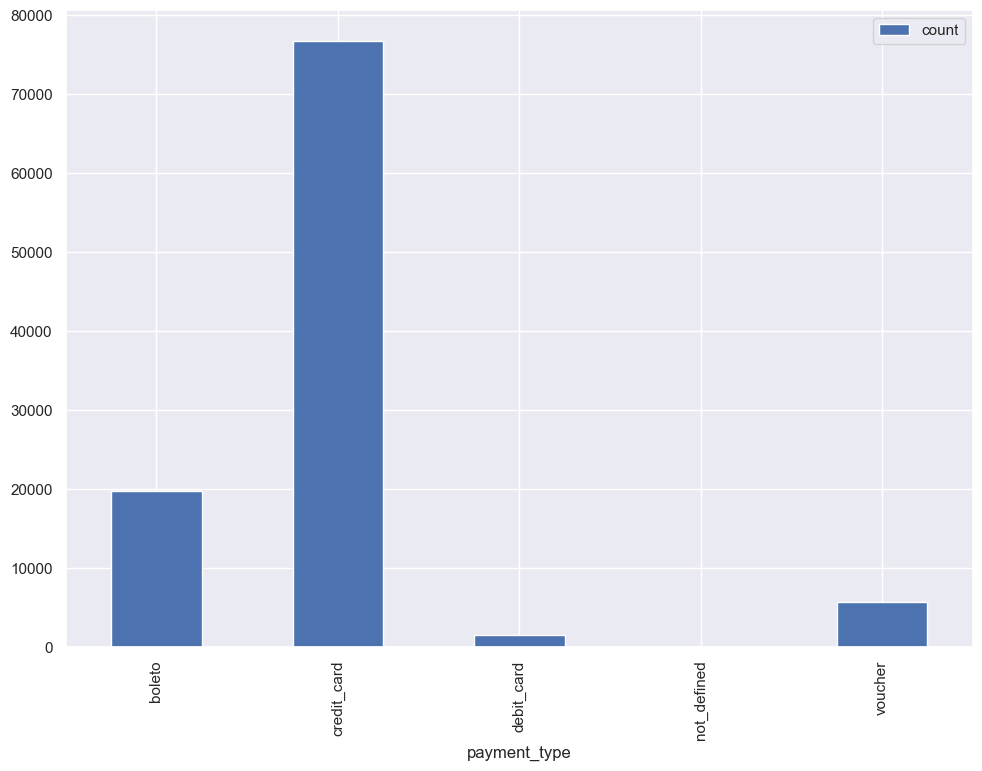

In [113]:
# Make a graph with payments type distribution
orders_payment.groupby(['payment_type']).count().reset_index()[["payment_type", "order_id"]].rename(columns={"order_id":"count"}).plot.bar(x="payment_type")


Most of the transactions are made using credit card, what is expected for an ecommerce store. On the other hand, there are null values for some dates such as the date of delivery to the customer and the date on which it passed to the carrier, but there are around 3000 values (the one with the most missing values), with respect to 99441 observations, so it is possible to carry out a general analysis of that values.

In [61]:
#changing strings to datetimes
orders_dataset["order_purchase_timestamp"] = pd.to_datetime(orders_dataset["order_purchase_timestamp"])
orders_dataset["order_approved_at"] = pd.to_datetime(orders_dataset["order_approved_at"])
orders_dataset["order_delivered_carrier_date"] = pd.to_datetime(orders_dataset["order_delivered_carrier_date"])
orders_dataset["order_delivered_customer_date"] = pd.to_datetime(orders_dataset["order_delivered_customer_date"])
orders_dataset["order_estimated_delivery_date"] = pd.to_datetime(orders_dataset["order_estimated_delivery_date"])

In [62]:
#The idea is to analyze the behavior of the sales process, for this we only require orders that have already been delivered.
orders_delivered=orders_dataset.loc[orders_dataset["order_status"]=='delivered'].copy()
display("shape before",orders_delivered.shape)
display(orders_delivered.isna().sum())
#Because we have just a few values missing we are goint to remove them taking account those observations represent 0.02% of the data
orders_delivered.dropna(inplace=True)
display("shape after",orders_delivered.shape)

'shape before'

(96478, 8)

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

'shape after'

(96455, 8)

<AxesSubplot:xlabel='time_type', ylabel='difference_times'>

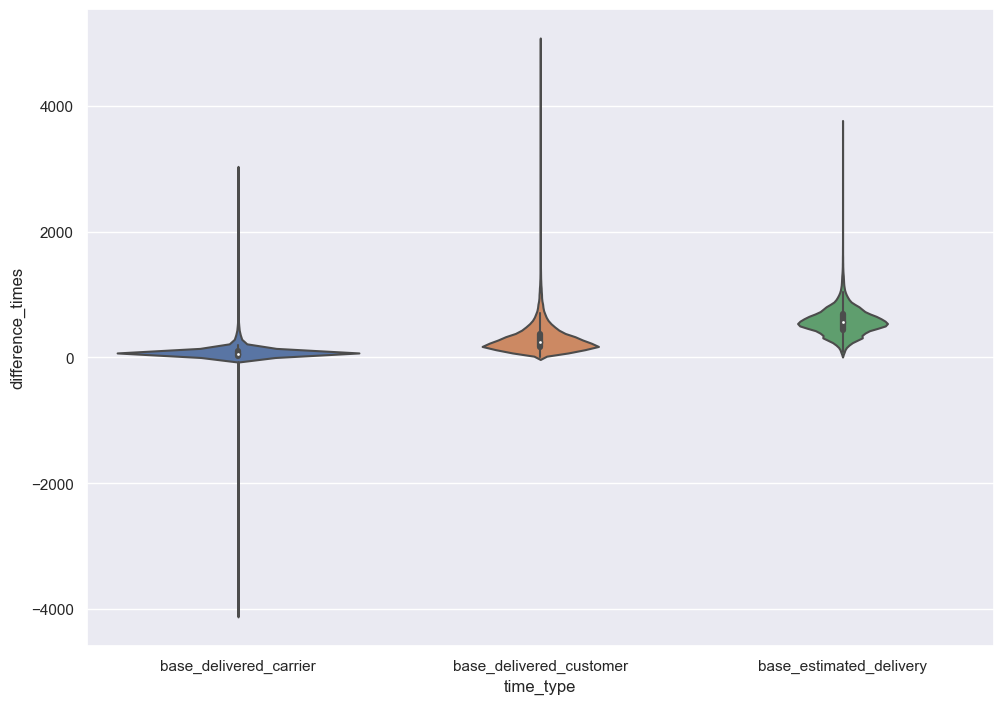

In [78]:
#If we take the purchase timestamp as our baseline to define the times of the entire sales process, we can get an idea of the general behavior
orders_delivered["base_approved"]=(orders_dataset["order_approved_at"] - orders_dataset["order_purchase_timestamp"])/pd.Timedelta('1h')
orders_delivered["base_delivered_carrier"]=(orders_dataset["order_delivered_carrier_date"] - orders_dataset["order_purchase_timestamp"])/pd.Timedelta('1h')
orders_delivered["base_delivered_customer"]=(orders_dataset["order_delivered_customer_date"] - orders_dataset["order_purchase_timestamp"])/pd.Timedelta('1h')
orders_delivered["base_estimated_delivery"]=(orders_dataset["order_estimated_delivery_date"] - orders_dataset["order_purchase_timestamp"])/pd.Timedelta('1h')
orders_delivered["estimated_delivery_delivered_customer"]=(orders_dataset["order_estimated_delivery_date"] - orders_dataset["order_delivered_customer_date"])/pd.Timedelta('1h')
#Make a graph to see the time differences
orders_delivered_melt = orders_delivered.melt(id_vars=['order_id'], value_vars=["base_delivered_carrier","base_delivered_customer","base_estimated_delivery"],
        var_name='time_type', value_name='difference_times')
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.violinplot(data=orders_delivered_melt, x="time_type", y="difference_times")

In the graph above it is possible to see the time differences between the date the purchase is made with: The date the carrier receives the order, the date it is delivered to the customer, and the date the customer is promised delivery, but there is something strange, there are negative values between the date that it was delivered to the carrier and the pruchase'sdate. Let's look at the following records:

In [81]:
orders_delivered.loc[orders_delivered["base_delivered_carrier"]<-100][["order_purchase_timestamp","order_delivered_carrier_date","base_delivered_carrier"]]

order_purchase_timestamp order_delivered_carrier_date  \
25883      2018-07-16 18:40:53          2018-01-26 13:35:00   
83321      2018-08-18 11:49:40          2018-08-14 06:22:00   

       base_delivered_carrier  
25883            -4109.098056  
83321             -101.461111

Is there any sense that the purchase was made on 2018-07-16 but the carrier received it on 2018-01-26? This means that we have errors in the data, which is why, in order not to increase the bias of the data to these values that are less than zero, we are going to assign them the same purchase time, taking into account that in the distribution these dates tend to be similar.

<AxesSubplot:xlabel='time_type', ylabel='difference_times'>

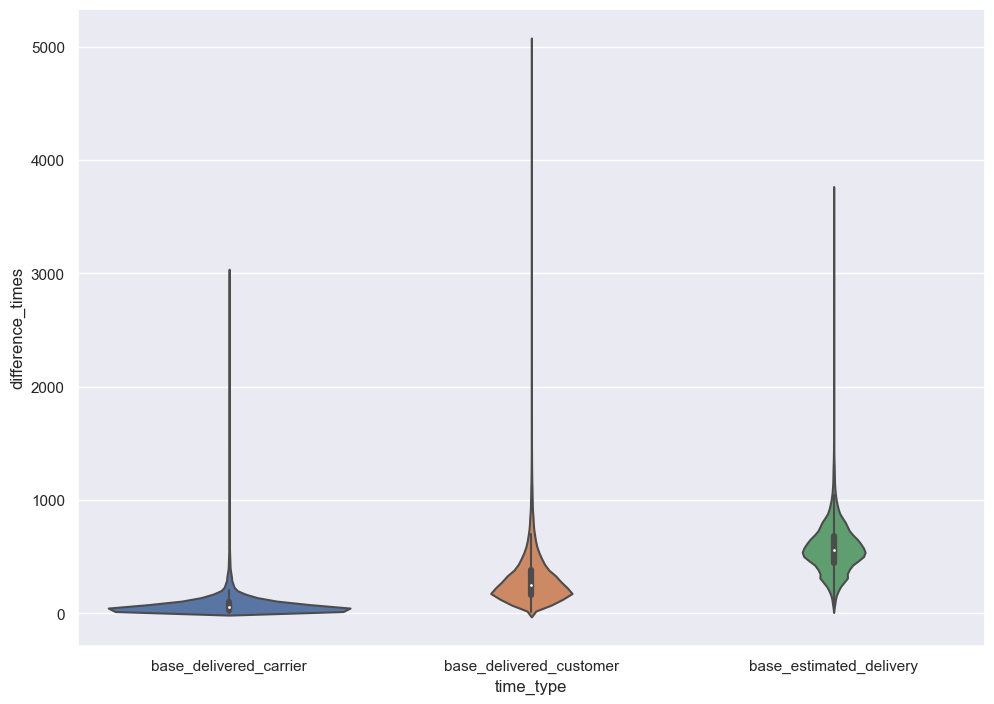

In [84]:
orders_delivered.loc[orders_delivered["base_delivered_carrier"]<0,"base_delivered_carrier"]=0
#Make a graph to see the time differences
orders_delivered_melt = orders_delivered.melt(id_vars=['order_id'], value_vars=["base_delivered_carrier","base_delivered_customer","base_estimated_delivery"],
        var_name='time_type', value_name='difference_times')
sns.violinplot(data=orders_delivered_melt, x="time_type", y="difference_times")

There are still some outliers in the data, but does this mean it is good or bad? let's review what was the estimated delivery time vs the delivery time

[Text(0.5, 1.0, 'Difference between Estimated deliver time and Delivered time (Hours)')]

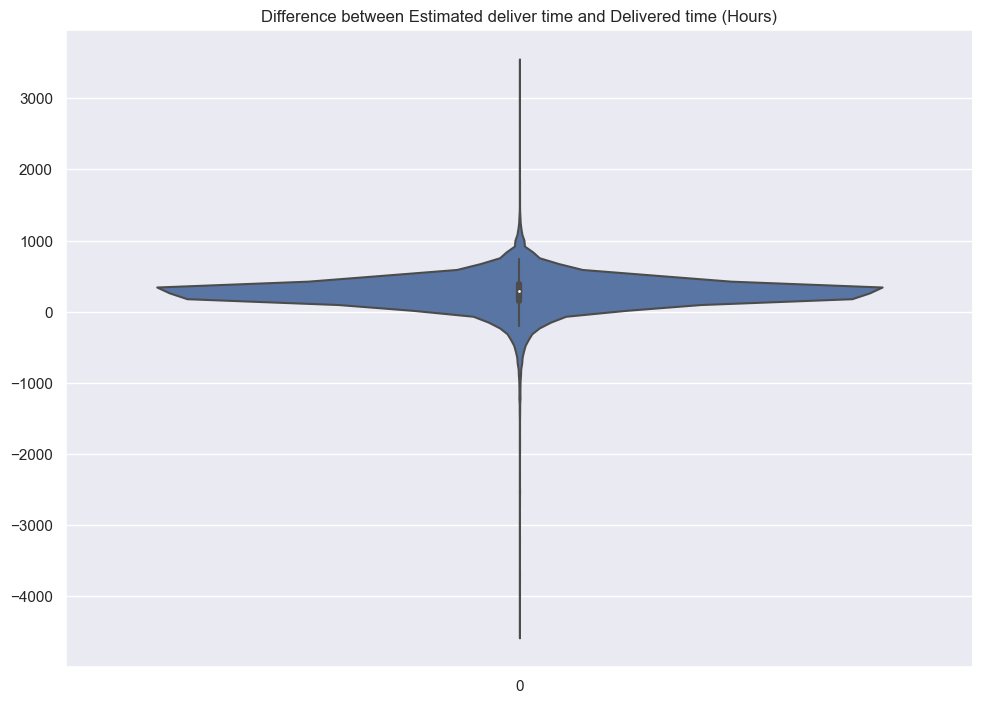

In [89]:
#Make a graph to see the time differences
sns.violinplot(data=orders_delivered["estimated_delivery_delivered_customer"]).set(title='Difference between Estimated deliver time and Delivered time (Hours)')

It is observed that the times tend to be positive, which means that in general the estimated delivery time is greater than the actual delivery time. Those who are superior outliers are not so alarming since they are those customers who received their delivery much earlier than the estimated. However, those extreme negative values show that there are others that were delivered much later than expected.

<a name="secondq"></a>
### Second Question
Is it possible that there is a relationship between purchase times, purchase value and customer rating?